In [6]:
%matplotlib inline 
import numpy as np 
import pandas as pd
import pandas.io.data as web
import json
import urllib2
from bs4 import BeautifulSoup

In [7]:
type_company=raw_input('Type the Company:')
def find_stock_ticker(type_company):
    url='http://www.bloomberg.com/markets/symbolsearch?query={0}&commit=Find+Symbols'.format(type_company)
    html=urllib2.urlopen(url).read()
    soup=BeautifulSoup(html,'lxml')
    #html.close() 
    string=soup.findAll('td')[0].next.contents
    if ':' in str(string):
        print "Yes"
        return " ".join(str(x) for x in string)
    else:
        return " ".join(str(x) for x in string)
        pass
    
find_stock_ticker(type_company)


Type the Company:Apple
Yes


'AAPL:US'

In [8]:
sp500 = web.DataReader('AAPL', data_source='yahoo',start='1/1/2000', end='4/14/2016')

In [9]:
sp500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.874997,112.499998,101.687501,111.937502,133949200,3.702290
2000-01-04,108.250001,110.625002,101.187503,102.500003,128094400,3.390148
2000-01-05,103.749998,110.562497,103.000001,103.999997,194580400,3.439760
2000-01-06,106.124999,106.999999,94.999998,94.999998,191993200,3.142089
2000-01-07,96.499999,101.000002,95.500003,99.500001,115183600,3.290924


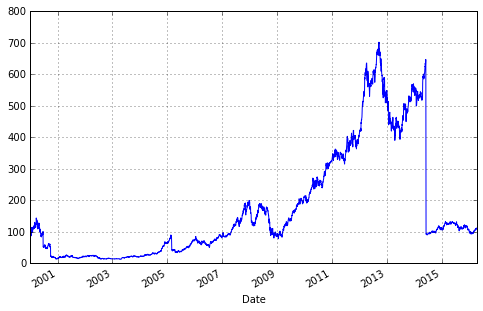

In [10]:
sp500['Close'].plot(grid=True, figsize=(8, 5))

In [11]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Close'], window=42), 2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['Close'], window=252), 2)

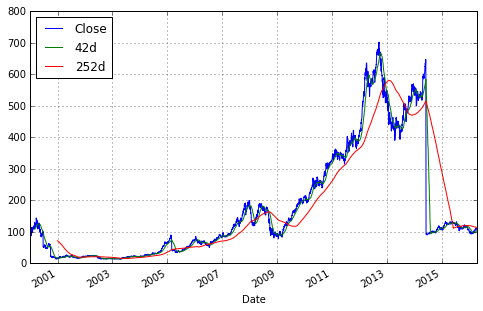

In [12]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

In [25]:
get_quote('googl')

'764.32'